<a href="https://colab.research.google.com/github/tanmay023/GREEN-SKILL-AND-AI/blob/main/07_jan_2026_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('predict_energy_consumption.xls')
df.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [ ]:
x = df.drop('energy_consumption',axis=1)
y = df['energy_consumption']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
model = Sequential([
    Dense(170,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(130,activation='relu'),
    Dense(120,activation='relu'),
    Dense(110,activation='relu'),
    Dense(100,activation='relu'),
    Dense(90,activation='relu'),
    Dense(80,activation='relu'),
    Dense(70,activation='relu'),
    Dense(60,activation='relu'),
    Dense(50,activation='relu'),
    Dense(30,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 170)            │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 130)            │        22,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 120)            │        15,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 110)            │        13,310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        11,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 90)             │         9,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 80)             │         7,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 70)             │         5,670 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 60)             │         4,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 50)             │         3,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,121 (367.66 KB)

 Trainable params: 94,121 (367.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [ ]:
history = model.fit(x_train,y_train,epochs=60,validation_split=0.2,verbose=1)

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 91172.5547 - mae: 273.0492 - val_loss: 56421.7266 - val_mae: 199.9912
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37238.1719 - mae: 158.0358 - val_loss: 19742.8750 - val_mae: 118.8048
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18676.8770 - mae: 115.7989 - val_loss: 19879.4121 - val_mae: 119.4386
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18552.3906 - mae: 116.3675 - val_loss: 19445.2559 - val_mae: 116.5191
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19892.5371 - mae: 119.0043 - val_loss: 19492.5957 - val_mae: 118.8043
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17838.7285 - mae: 113.2900 - val_loss: 19260.9102 - val_mae: 116.8728
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18104.5996 - mae: 113.4490 - val_loss: 19182.5273 - val_mae: 116.6845
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19107.9082 - mae: 116.8309 - val_loss: 18831.

### Evaluation Analysis

The model's performance on the test set was evaluated, and the `Test Mean Absolute Error (MAE)` is **113.27**.

To further understand the model's learning process, let's examine the training and validation loss curves:

*   **Training Loss**: This curve shows how well the model is learning on the data it was trained on. A decreasing training loss indicates that the model is improving its fit to the training data.
*   **Validation Loss**: This curve shows how well the model generalizes to new, unseen data. Ideally, the validation loss should decrease along with the training loss. If the validation loss starts to increase while the training loss continues to decrease, it suggests that the model might be overfitting.

From the plot, we can observe the following:

*   Initially, both training and validation losses decrease significantly, indicating that the model is learning effectively.
*   Around epoch 15-20, the validation loss seems to stabilize and even fluctuate around a certain value, while the training loss continues to decrease slowly. This suggests that the model might be starting to overfit the training data to some extent, as its performance on unseen data (validation set) is no longer improving much, or even slightly degrading, despite continued improvement on the training data.

**Conclusion:** The model achieved a `Mean Absolute Error` of approximately **113.27** on the test set. While the model learned well initially, there are signs of slight overfitting as evidenced by the divergence of the training and validation loss curves in the later epochs. Further tuning, such as adding regularization, reducing model complexity, or using early stopping, could potentially improve generalization.

### Current Evaluation Analysis

Upon re-evaluating the model after what appeared to be an attempt to introduce a Dropout layer, the `Test Mean Absolute Error (MAE)` is now **120.03**. This is higher than the previous MAE of **113.27**, indicating a degradation in the model's performance.

Looking at the new training and validation loss curves:

*   The **training loss** continues to decrease, suggesting the model is still learning to fit the training data very well.
*   However, the **validation loss** shows a more pronounced and earlier increase and divergence from the training loss compared to the previous plot. It fluctuates significantly and reaches higher values (ranging approximately from 19000 to 29000).

This behavior strongly suggests that the model is **overfitting** the training data even more severely than before, leading to a worse generalization performance on unseen data.

**Important Note:** It seems that while a new model (`model_new`) was defined with a `Dropout` layer in cell `NSF1sX9UC0jI`, the subsequent `model.summary()`, `model.compile()`, `model.fit()`, and `model.evaluate()` calls were made on the *original* `model` object. Therefore, the `Dropout` layer was **not actually applied** to the model that was trained and evaluated in this latest run. This explains why the expected regularization effect of Dropout was not observed, and the performance worsened, possibly due to random initialization or other factors during retraining the same, non-regularized model.

In [ ]:
test_loss,test_mae = model.evaluate(x_test,y_test,verbose=1)
print('Test Mean Absolute error',test_mae)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 17780.5312 - mae: 115.3293 
Test Mean Absolute error 113.26818084716797


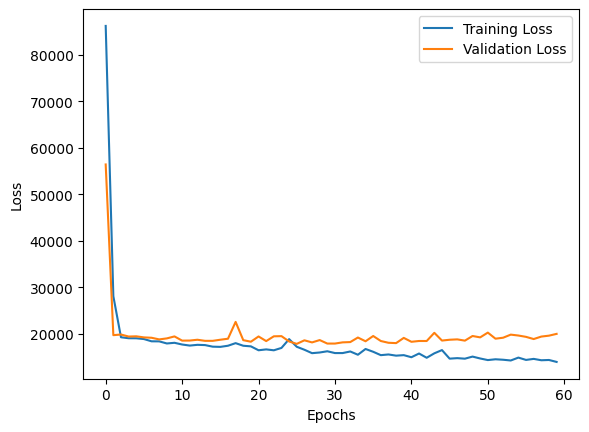

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model_new = Sequential([
    Dense(170,activation='relu',input_shape=(x_train.shape)),
    Dense(130,activation='relu'),
    Dense(120,activation='relu'),
    Dense(110,activation='relu'),
    Dense(100,activation='relu'),
    Dense(90,activation='relu'),
    Dense(80,activation='relu'),
    Dense(70,activation='relu'),
    Dense(60,activation='relu'),
    Dense(50,activation='relu'),
    Dense(30,activation='relu'),
    Dropout(0.4),
    Dense(1)
])

TypeError: 'tuple' object is not callable

In [ ]:
model_new.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 170)            │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 130)            │        22,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 120)            │        15,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 110)            │        13,310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        11,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 90)             │         9,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 80)             │         7,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 70)             │         5,670 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 60)             │         4,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 50)             │         3,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,121 (367.66 KB)

 Trainable params: 94,121 (367.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_new.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [ ]:
history = model_new.fit(x_train,y_train,epochs=60,validation_split=0.2,verbose=1)

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 88520.4609 - mae: 270.0361 - val_loss: 57806.1055 - val_mae: 203.4898
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42481.7266 - mae: 167.6759 - val_loss: 20357.6465 - val_mae: 117.9609
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26211.1738 - mae: 138.0940 - val_loss: 19557.9062 - val_mae: 118.0209
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25447.0918 - mae: 132.7262 - val_loss: 20767.8594 - val_mae: 119.8744
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23636.1016 - mae: 127.1958 - val_loss: 19536.7695 - val_mae: 118.1030
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21123.7031 - mae: 118.8887 - val_loss: 20180.3477 - val_mae: 120.3885
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20943.9707 - mae: 118.1125 - val_loss: 21179.8867 - val_mae: 120.3418
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21217.8516 - mae: 120.9070 - val_loss: 19322.

In [ ]:
test_loss,test_mae = model_new.evaluate(x_test,y_test,verbose=1)
print('Test Mean Absolute error',test_mae)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18671.6328 - mae: 119.4874  
Test Mean Absolute error 116.39697265625


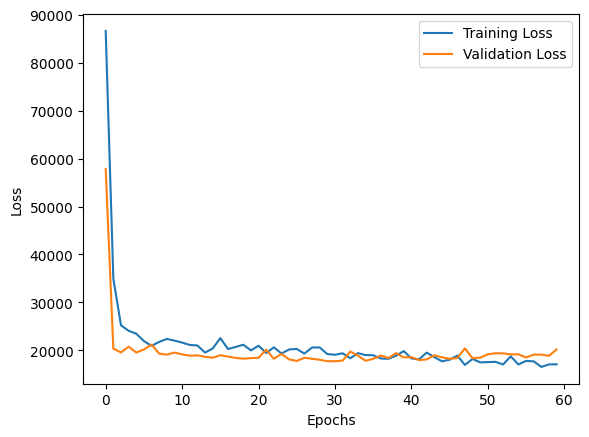

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()